In [12]:
import numpy as np
import cv2

image = cv2.imread('Sign file 4.png')
result = image.copy()
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower = np.array([90, 38, 0])
upper = np.array([145, 255, 255])
mask = cv2.inRange(image, lower, upper)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)
close = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=2)

cnts = cv2.findContours(close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

boxes = []
for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    boxes.append([x,y, x+w,y+h])

boxes = np.asarray(boxes)
left = np.min(boxes[:,0])
top = np.min(boxes[:,1])
right = np.max(boxes[:,2])
bottom = np.max(boxes[:,3])

result[close==0] = (255,255,255)
ROI = result[top:bottom, left:right].copy()
cv2.rectangle(result, (left,top), (right,bottom), (36, 255, 12), 2)

cv2.imshow('result', result)
#cv2.imshow('ROI', ROI)
#cv2.imshow('close', close)
cv2.imwrite('result.png', result)
cv2.imwrite('ROI.png', ROI)
cv2.waitKey()

-1

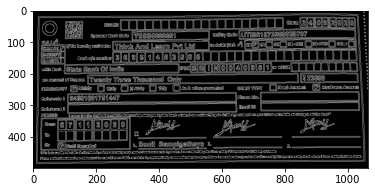

In [6]:
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt

image = cv2.imread('Sign file 4.png')

original = image.copy()
ratio = image.shape[0]/500.0
image = imutils.resize(image,height=500)
orig = image.copy()
#converting to grayscale image
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray,(5,5),0)
plt.imshow(gray,'gray')
edged = cv2.Canny(gray,80,200)
plt.imshow(edged,'gray')

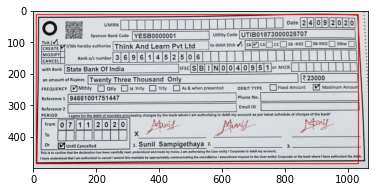

In [7]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key= cv2.contourArea, reverse=True)[:1]
for c in cnts:
    peri = cv2.arcLength(c,True)
    apprx = cv2.approxPolyDP(c, 0.2*peri, True)
    x,y,w,h = cv2.boundingRect(apprx)
    cv2.rectangle(orig,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(orig)

In [10]:
from skimage.metrics import structural_similarity
import numpy as np
import cv2
i = cv2.cvtColor(cv2.imread('Sign file 4.png'),cv2.COLOR_BGR2RGB)
wrong_image = cv2.resize(cv2.cvtColor(i.copy(),cv2.COLOR_BGR2GRAY),(100,100))
original_image = cv2.resize(cv2.cvtColor(orig.copy(),cv2.COLOR_BGR2GRAY),(100,100))
print(structural_similarity(original_image,original_image))
print(structural_similarity(original_image,wrong_image))

1.0
0.9760928188169609
